In [0]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq

from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from collections import Counter

#(a) Load Data

In [0]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))

Saving data.csv to data (1).csv


In [0]:
df['feature']=df['class'].map({'AB':1, 'NO':0})

#(b) i.Scatter Plot

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


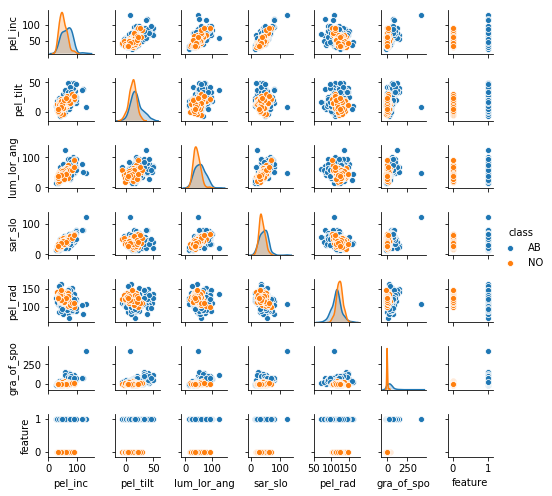

In [0]:
sns.pairplot(df, hue='class',height=1)

#(b) ii Boxplots

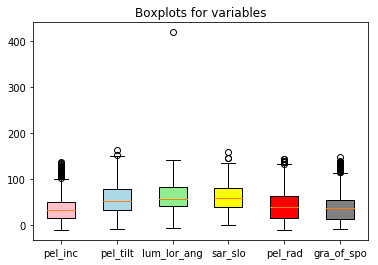

In [0]:
all_data = np.array(df.iloc[:,:6]).reshape(6,310)
all_data = [all_data[i] for i in range(len(all_data))]
labels = ['pel_inc','pel_tilt','lum_lor_ang','sar_slo','pel_rad','gra_of_spo']

bplot = plt.boxplot(all_data, patch_artist=True, labels=labels)
plt.title('Boxplots for variables')

colors = ['pink','lightblue','lightgreen','yellow','red','grey']
for box,color in zip(bplot['boxes'],colors):
  box.set_facecolor(color)
  
plt.show()

#(b) iii.Data Split

In [0]:
train_AB=df[df['class']=='AB'].iloc[:140,:]
train_NO=df[df['class']=='NO'].iloc[:70,:]
train=pd.concat([train_AB,train_NO])
test_AB=df[df['class']=='AB'].iloc[140:,:]
test_NO=df[df['class']=='NO'].iloc[70:,:]
test=pd.concat([test_AB,test_NO])

#(c) i.KNN Fitting in Euclidean metric

In [0]:
K=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
for k in range(1,len(train),3):
    K.append(k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train.iloc[:,:6],train.loc[:,'feature'])
    pred_test_y = neigh.predict(test.iloc[:,:6])
    pred_train_y = neigh.predict(train.iloc[:,:6])
    c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
    c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
    error_test = (c_test[0,1]+c_test[1,0])/len(test)
    error_train = ((c_train[0,1]+c_train[1,0])/len(train))
    ERROR_TEST.append(error_test)
    ERROR_TRAIN.append(error_train)

#(c) ii.Find the Best K, Plot and Matrics Calculation

Text(0.5, 0, 'K-value')

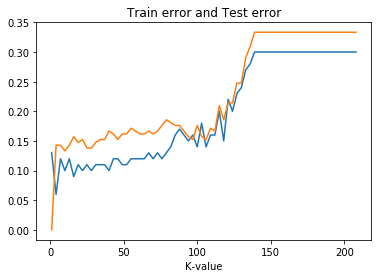

In [0]:
result=pd.DataFrame({'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})

plt.figure()
plt.plot(result['K'],result['test error'])
plt.plot(result['K'],result['train error'])
plt.title('Train error and Test error')
plt.xlabel('K-value')

After looking at the picture of errors in training set and test set, we find that the best K* is __4__, so we made calculation according to this value.

In [0]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(train.iloc[:,:6],train.loc[:,'feature'])
pred_test_y = neigh.predict(test.iloc[:,:6])
pred_train_y = neigh.predict(train.iloc[:,:6])
c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)

beta=0.3
TN_rate=c_test[0,0]/c_test[0,0]+c_test[0,1]
TP_rate=c_test[1,1]/c_test[1,0]+c_test[1,1]
Prec_T=c_test[1,1]/c_test[0,1]+c_test[1,1]
Fscore=(1+beta**2)*(TP_rate+Prec_T)/(beta**2*Prec_T+TP_rate)

print('True Positive rate: {}\nTrue Negative rate: {}\nPrecision: {}\nF-score: {}'.format(TN_rate,TP_rate,Prec_T,Fscore))

True Positive rate: 6.0
True Negative rate: 138.0
Precision: 82.8
F-score: 1.6546489563567364


#(c) iii. Adjust sample size besides K value

In [0]:
K=[]
N=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
for n in range(10,211,10):
  train_AB=df[df['class']=='AB'].iloc[:n-round(n/3),:]
  train_NO=df[df['class']=='NO'].iloc[:round(n/3),:]
  train=pd.concat([train_AB,train_NO])
  test_AB=df[df['class']=='AB'].iloc[n-round(n/3):,:]
  test_NO=df[df['class']=='NO'].iloc[round(n/3):,:]
  test=pd.concat([test_AB,test_NO])
  for k in range(1,n,5):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train.iloc[:,:6],train.loc[:,'feature'])
    pred_test_y = neigh.predict(test.iloc[:,:6])
    pred_train_y = neigh.predict(train.iloc[:,:6])
    c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
    c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
    error_test = (c_test[0,1]+c_test[1,0])/len(test)
    error_train = ((c_train[0,1]+c_train[1,0])/len(train))
    K.append(k)
    N.append(n)
    ERROR_TEST.append(error_test)
    ERROR_TRAIN.append(error_train)
result1=pd.DataFrame({'training size':N,'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})

In [0]:
result1[(result1['test error']==min(result1['test error']))]

,training size,K,test error,train error
343,190,6,0.075,0.147368


#(d) Replace the distance metric
## i. Minkowski Distance
###A. Manhattan Distance 

In [0]:
K=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
train_AB=df[df['class']=='AB'].iloc[:140,:]
train_NO=df[df['class']=='NO'].iloc[:70,:]
train=pd.concat([train_AB,train_NO])
test_AB=df[df['class']=='AB'].iloc[140:,:]
test_NO=df[df['class']=='NO'].iloc[70:,:]
test=pd.concat([test_AB,test_NO])
for k in range(1,197,5):
  neigh = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
  neigh.fit(train.iloc[:,:6],train.loc[:,'feature'])
  pred_test_y = neigh.predict(test.iloc[:,:6])
  pred_train_y = neigh.predict(train.iloc[:,:6])
  c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
  c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
  error_test = (c_test[0,1]+c_test[1,0])/len(test)
  error_train = ((c_train[0,1]+c_train[1,0])/len(train))
  K.append(k)
  ERROR_TEST.append(error_test)
  ERROR_TRAIN.append(error_train)
result2=pd.DataFrame({'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})
result2[(result2['test error']==min(result2['test error']))]

,K,test error,train error
1,6,0.11,0.138095
2,11,0.11,0.142857
5,26,0.11,0.166667


K* is 6 according to the result.  
###B. Select the best P using K*

In [0]:
I=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
for i in range(1,11):
  I.append(i/10)
  neigh = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=10**(i/10))
  neigh.fit(train.iloc[:,:6],train.loc[:,'feature'])
  pred_test_y = neigh.predict(test.iloc[:,:6])
  pred_train_y = neigh.predict(train.iloc[:,:6])
  c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
  c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
  error_test = (c_test[0,1]+c_test[1,0])/len(test)
  error_train = ((c_train[0,1]+c_train[1,0])/len(train))
  K.append(k)
  ERROR_TEST.append(error_test)
  ERROR_TRAIN.append(error_train)
result3=pd.DataFrame({'log10_P':I,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})
result3[(result3['test error']==min(result3['test error']))]

,log10_P,test error,train error
5,0.6,0.06,0.152381


0.6 is the best $log_{10}(p)$

## Mahalanobis Distance

In [0]:
K=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
train_AB=df[df['class']=='AB'].iloc[:140,:]
train_NO=df[df['class']=='NO'].iloc[:70,:]
train=pd.concat([train_AB,train_NO])
test_AB=df[df['class']=='AB'].iloc[140:,:]
test_NO=df[df['class']=='NO'].iloc[70:,:]
test=pd.concat([test_AB,test_NO])
x=np.array(train.iloc[:,:6])
y=np.array(test.iloc[:,:6])

In [0]:
s_test=np.cov(df.iloc[:,:6].T)
s_train=np.cov(train.iloc[:,:6].T)
invs_test=np.linalg.inv(s_test)
invs_train=np.linalg.inv(s_train)
for k in range(1,197,5):
  test_feature=[]
  train_feature=[]
  for j in range(len(test)):
    distances=[]
    for i in range(len(train)):
      distances.append(np.sqrt(np.dot(np.dot(x[i]-y[j],invs_test),(x[i]-y[j]).T)))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    knn=train.iloc[index,7]
    test_feature.append(Counter(knn).most_common()[0][0])
  for j in range(len(train)):
    distances=[]
    for i in range(len(train)):
      distances.append(np.sqrt(np.dot(np.dot(x[i]-x[j],invs_train),(x[i]-x[j]).T)))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    knn=train.iloc[index,7]
    train_feature.append(Counter(knn).most_common()[0][0])
  c_test = confusion_matrix(test.loc[:,'feature'],test_feature)
  c_train = confusion_matrix(train.loc[:,'feature'],train_feature)
  error_test = (c_test[0,1]+c_test[1,0])/len(test)
  error_train = ((c_train[0,1]+c_train[1,0])/len(train))
  K.append(k)
  ERROR_TEST.append(error_test)
  ERROR_TRAIN.append(error_train)
result4=pd.DataFrame({'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})
result4[(result4['test error']==min(result4['test error']))]

,K,test error,train error
0,1,0.18,0.000000
1,6,0.18,0.066667
3,16,0.18,0.152381


best K for Mahalanobis distance is k = 1, test error is 0.18
#(e) Weighted Voting
## Euclidean distance

In [0]:
K=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
p=2
for k in range(1,197,5):
  pred_test_y=[]
  pred_train_y=[]
  for i in range(len(test)):
    distances=[]
    for j in range(len(train)):
      distances.append(np.sum(abs(y[i]-x[j])**p)**(1/p))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    pindex=[n for n in index if train.iloc[n,7] == 1]
    nindex=[n for n in index if train.iloc[n,7] == 0]
    pweight=sum([1/distances[n] for n in pindex])
    nweight=sum([1/distances[n] for n in nindex])
    pred_test_y.append(1) if pweight>nweight else pred_test_y.append(0)
  for i in range(len(train)):
    distances=[]
    for j in range(len(train)):
      distances.append(np.sum(abs(x[i]-x[j])**p)**(1/p))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    pindex=[n for n in index if train.iloc[n,7] == 1]
    nindex=[n for n in index if train.iloc[n,7] == 0]
    pweight=sum([1/distances[n] for n in pindex])
    nweight=sum([1/distances[n] for n in nindex])
    pred_train_y.append(1) if pweight>nweight else pred_train_y.append(0)
  c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
  c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
  error_test = (c_test[0,1]+c_test[1,0])/len(test)
  error_train = ((c_train[0,1]+c_train[1,0])/len(train))
  K.append(k)
  ERROR_TEST.append(error_test)
  ERROR_TRAIN.append(error_train)
result5=pd.DataFrame({'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})
result5[(result5['test error']==min(result5['test error']))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


,K,test error,train error
1,6,0.1,0.0


## Manhattan Distance

In [0]:
K=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
p=1
for k in range(1,197,5):
  pred_test_y=[]
  pred_train_y=[]
  for i in range(len(test)):
    distances=[]
    for j in range(len(train)):
      distances.append(np.sum(abs(y[i]-x[j])**p)**(1/p))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    pindex=[n for n in index if train.iloc[n,7] == 1]
    nindex=[n for n in index if train.iloc[n,7] == 0]
    pweight=sum([1/distances[n] for n in pindex])
    nweight=sum([1/distances[n] for n in nindex])
    pred_test_y.append(1) if pweight>nweight else pred_test_y.append(0)
  for i in range(len(train)):
    distances=[]
    for j in range(len(train)):
      distances.append(np.sum(abs(x[i]-x[j])**p)**(1/p))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    pindex=[n for n in index if train.iloc[n,7] == 1]
    nindex=[n for n in index if train.iloc[n,7] == 0]
    pweight=sum([1/distances[n] for n in pindex])
    nweight=sum([1/distances[n] for n in nindex])
    pred_train_y.append(1) if pweight>nweight else pred_train_y.append(0)
  c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
  c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
  error_test = (c_test[0,1]+c_test[1,0])/len(test)
  error_train = ((c_train[0,1]+c_train[1,0])/len(train))
  K.append(k)
  ERROR_TEST.append(error_test)
  ERROR_TRAIN.append(error_train)
result6=pd.DataFrame({'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})
result6[(result6['test error']==min(result6['test error']))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


,K,test error,train error
5,26,0.1,0.0


## Chebyshev Distance

In [0]:
K=[]
ERROR_TEST=[]
ERROR_TRAIN=[]
p=1
for k in range(1,197,5):
  pred_test_y=[]
  pred_train_y=[]
  for i in range(len(test)):
    distances=[]
    for j in range(len(train)):
      distances.append(np.max(abs(y[i]-x[j])))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    pindex=[n for n in index if train.iloc[n,7] == 1]
    nindex=[n for n in index if train.iloc[n,7] == 0]
    pweight=sum([1/distances[n] for n in pindex])
    nweight=sum([1/distances[n] for n in nindex])
    pred_test_y.append(1) if pweight>nweight else pred_test_y.append(0)
  for i in range(len(train)):
    distances=[]
    for j in range(len(train)):
      distances.append(np.max(abs(x[i]-x[j])))
    k_min = heapq.nsmallest(k,distances)
    index=[]
    for distance in k_min:
      index.append(distances.index(distance))
    pindex=[n for n in index if train.iloc[n,7] == 1]
    nindex=[n for n in index if train.iloc[n,7] == 0]
    pweight=sum([1/distances[n] for n in pindex])
    nweight=sum([1/distances[n] for n in nindex])
    pred_train_y.append(1) if pweight>nweight else pred_train_y.append(0)
  c_test = confusion_matrix(test.loc[:,'feature'],pred_test_y)
  c_train = confusion_matrix(train.loc[:,'feature'],pred_train_y)
  error_test = (c_test[0,1]+c_test[1,0])/len(test)
  error_train = ((c_train[0,1]+c_train[1,0])/len(train))
  K.append(k)
  ERROR_TEST.append(error_test)
  ERROR_TRAIN.append(error_train)
result7=pd.DataFrame({'K':K,'test error':ERROR_TEST, 'train error':ERROR_TRAIN})
result7[(result7['test error']==min(result7['test error']))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


,K,test error,train error
3,16,0.11,0.0
4,21,0.11,0.0
5,26,0.11,0.0
6,31,0.11,0.0
7,36,0.11,0.0


#(f)   
The  lowest training error rate  is 0.06, achieved in $log_{10}P = 0.6$